# Demo of Schema Explorer

Python Package to view, analyze and edit schemas defined in schema.org way

## Outline:
1. Visualize an Existing Schema (Using BioLink Schema as an Example)
2. Explore a Portion of the Schema
3. Add New Properties to an Existing Schema (Using SAGE/Chemcial as an Example)
4. Add New Classes to an Existing Schema
5. Export Updated Schema

## Import Module

In [3]:
from schema_explorer import SchemaExplorer

Note: when initializing Schema Explorer, the BioLink schema is loaded by default

In [4]:
se = SchemaExplorer()

Preloaded with BioLink schema. Upload your own schema using "load_schema" function.


## Visualize the Full Schema

In [5]:
full_schema = se.full_schema_graph()

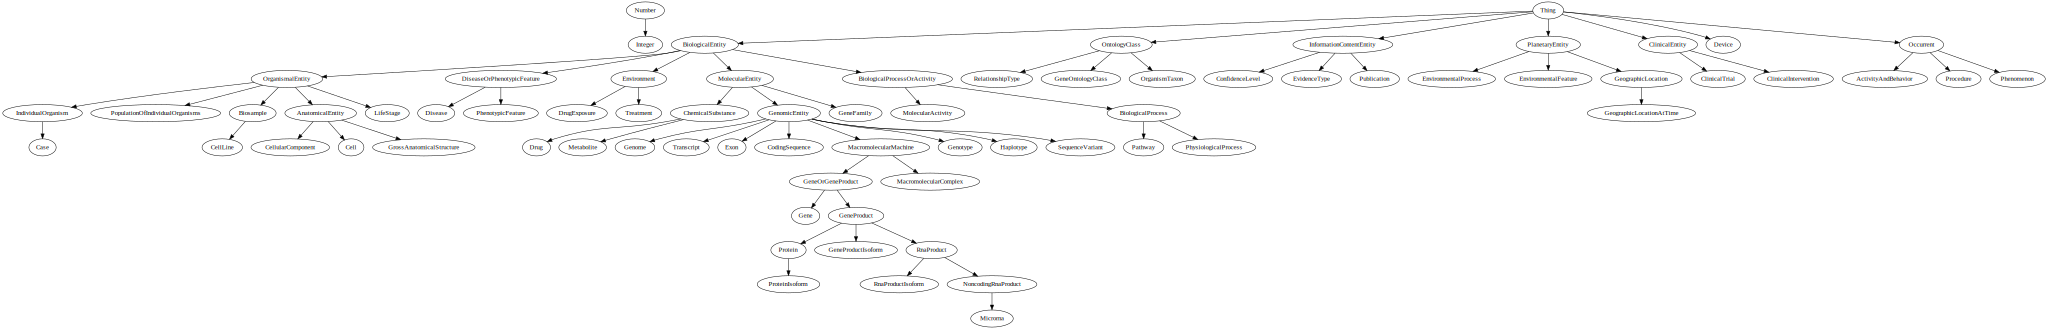

In [6]:
full_schema

## Visualize a portion of the schema

### Visualize all Ancestors of a specific class(node)

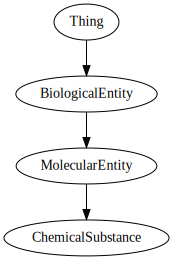

In [7]:
partial_schema = se.sub_schema_graph(source="ChemicalSubstance", direction="up")
partial_schema

### Visualize all Descendants of a specific class (node)

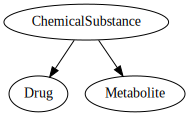

In [8]:
partial_schema = se.sub_schema_graph(source="ChemicalSubstance", direction="down")
partial_schema

### Visualize both ancestors and descendants of a specific class (node)

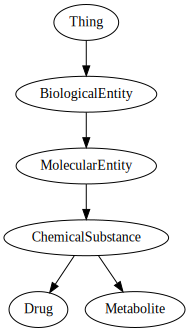

In [9]:
partial_schema = se.sub_schema_graph(source="ChemicalSubstance", direction="both")
partial_schema

## Explore a specific class

In [10]:
import pprint
pp = pprint.PrettyPrinter(indent=4)
class_info = se.explore_class('ChemicalSubstance')
pp.pprint(class_info)

{   'child_classes': ['Drug', 'Metabolite'],
    'description': 'May be a chemical entity or a formulation with a chemical '
                   'entity as active ingredient, or a complex material with '
                   'multiple chemical entities as part',
    'parent_classes': [['Thing', 'BiologicalEntity', 'MolecularEntity']],
    'properties': [   {'class': 'ChemicalSubstance', 'properties': []},
                      {   'class': 'MolecularEntity',
                          'properties': [   'molecularlyInteractsWith',
                                            'affectsAbundanceOf',
                                            'increasesAbundanceOf',
                                            'decreasesAbundanceOf',
                                            'affectsActivityOf',
                                            'increasesActivityOf',
                                            'decreasesActivityOf',
                                            'affectsExpressionOf',


## Add a New Property

Using Sage as an example:
https://github.com/Sage-Bionetworks/synapseAnnotations/blob/master/synapseAnnotations/data/chem.json

In [31]:
new_property = se.generate_property_template()
pp.pprint(new_property)

{   '@id': 'url or curie of the property',
    '@type': 'rdf:Property',
    'rdfs:comment': 'description of the property',
    'rdfs:label': 'carmel case, should match @id',
    'schema:domainIncludes': {   '@id': 'class which use it as a property, '
                                        'could be list'},
    'schema:isPartOf': {'@id': 'http://schema.biothings.io'},
    'schema:rangeIncludes': {   '@id': 'relates a property to a class that '
                                       'constitutes (one of) the expected '
                                       'type(s) for values of the property'}}


In [11]:
new_property = {    '@id': 'bts:structureFormat',
                    '@type': 'rdf:Property',
                    'rdfs:comment': 'The chemical structural representation used.',
                    'rdfs:label': 'structureFormat',
                    'schema:domainIncludes': {   '@id': 'bts:ChemicalSubstance'},
                    'schema:isPartOf': {'@id': 'http://schema.biothings.io'},
                    'schema:rangeIncludes': {   '@id': 'schema:Text'}}

Note: Everytime a new Property or Class is added, it will be validated against JSON-Schema

In [12]:
se.update_property(new_property)

Updated the property structureFormat successfully!


### Examine the update result

In [13]:
class_info = se.explore_class('ChemicalSubstance')
pp.pprint(class_info)

{   'child_classes': ['Drug', 'Metabolite'],
    'description': 'May be a chemical entity or a formulation with a chemical '
                   'entity as active ingredient, or a complex material with '
                   'multiple chemical entities as part',
    'parent_classes': [['Thing', 'BiologicalEntity', 'MolecularEntity']],
    'properties': [   {   'class': 'ChemicalSubstance',
                          'properties': ['structureFormat']},
                      {   'class': 'MolecularEntity',
                          'properties': [   'molecularlyInteractsWith',
                                            'affectsAbundanceOf',
                                            'increasesAbundanceOf',
                                            'decreasesAbundanceOf',
                                            'affectsActivityOf',
                                            'increasesActivityOf',
                                            'decreasesActivityOf',
                     

## Add a SubProperty

In [35]:
se.explore_property('structureFormat')

{'id': 'structureFormat',
 'description': 'The chemical structural representation used.',
 'uri': 'http://schema.biothings.io/structureFormat',
 'domain': 'ChemicalSubstance',
 'range': 'Text'}

In [14]:
new_property = {    '@id': 'bts:smiles',
                    '@type': 'rdf:Property',
                    'rdfs:comment': 'Specification for unambiguously describing the structure of a chemical compound using a short ASCII string.',
                    'rdfs:label': 'smiles',
                    'schema:domainIncludes': {   '@id': 'bts:ChemicalSubstance'},
                    'schema:isPartOf': {'@id': 'http://schema.biothings.io'},
                    'schema:rangeIncludes': {   '@id': 'schema:Text'},
                    'rdfs:subPropertyOf': {'@id': 'bts:structureFormat'}}

In [15]:
se.update_property(new_property)

Updated the property smiles successfully!


In [16]:
class_info = se.explore_class('ChemicalSubstance')
pp.pprint(class_info)

{   'child_classes': ['Drug', 'Metabolite'],
    'description': 'May be a chemical entity or a formulation with a chemical '
                   'entity as active ingredient, or a complex material with '
                   'multiple chemical entities as part',
    'parent_classes': [['Thing', 'BiologicalEntity', 'MolecularEntity']],
    'properties': [   {   'class': 'ChemicalSubstance',
                          'properties': ['structureFormat', 'smiles']},
                      {   'class': 'MolecularEntity',
                          'properties': [   'molecularlyInteractsWith',
                                            'affectsAbundanceOf',
                                            'increasesAbundanceOf',
                                            'decreasesAbundanceOf',
                                            'affectsActivityOf',
                                            'increasesActivityOf',
                                            'decreasesActivityOf',
           

## Add a New Class

In [39]:
new_class = se.generate_class_template()
pp.pprint(new_class)

{   '@id': 'uri or curie of the class',
    '@type': 'rdfs:Class',
    'rdfs:comment': 'description of the class',
    'rdfs:label': 'class label, should match @id',
    'rdfs:subClassOf': {'@id': 'parent class, could be list'},
    'schema:isPartOf': {'@id': 'http://schema.biothings.io'}}


In [17]:
new_class = {   '@id': 'bts:DietarySupplement',
                '@type': 'rdfs:Class',
                'rdfs:comment': 'A product taken by mouth that contains a dietary ingredient intended to supplement the diet. Dietary ingredients may include vitamins, minerals, herbs or other botanicals, amino acids, and substances such as enzymes, organ tissues, glandulars and metabolites.',
                'rdfs:label': 'DietartySupplement',
                'rdfs:subClassOf': {'@id': 'bts:ChemicalSubstance'},
                'schema:isPartOf': {'@id': 'http://schema.biothings.io'}}

In [18]:
se.update_class(new_class)

Updated the class DietartySupplement successfully!


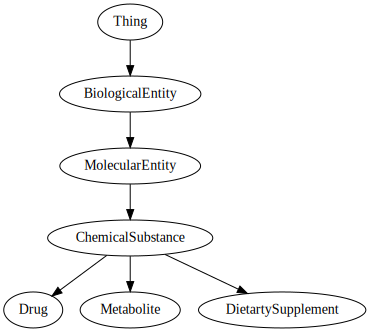

In [19]:
partial_schema = se.sub_schema_graph(source="ChemicalSubstance", direction="both")
partial_schema

## Export an Edited Schema

In [43]:
se.export_schema('schema_explorer/data/new_schema.jsonld')